# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

# Using K Means

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [6]:
crime = pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
crime.shape

(50, 5)

In [10]:
crime =crime.rename({'Unnamed: 0':'City'},axis=1)

In [11]:
crime

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [12]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.3+ KB


In [14]:
crime['Rape']=crime['Rape'].astype(float)

In [15]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.3+ KB


In [16]:
crime.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [18]:
crime.duplicated().sum()

0

In [23]:
crime['City'].value_counts()

Alabama           1
Pennsylvania      1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Oregon            1
Rhode Island      1
Alaska            1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             1
Utah              1
Vermont           1
Virginia          1
Washington        1
West Virginia     1
Wisconsin         1
Nebraska          1
Montana           1
Missouri          1
Mississippi       1
Arizona           1
Arkansas          1
California        1
Colorado          1
Connecticut       1
Delaware          1
Florida           1
Georgia           1
Hawaii            1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Kentucky          1
Louisiana         1
Maine             1
Maryland          1
Massachusetts     1
Michigan          1
Minnesota         1
Wyoming           1


In [31]:
#As every city is single drop the column
crime.drop('City',axis=1,inplace=True)

In [32]:
sd=StandardScaler()

In [35]:
crime_transf=sd.fit_transform(crime)

In [37]:
crime_transf

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [38]:
# Checking for optimal value of K with Elbow method

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


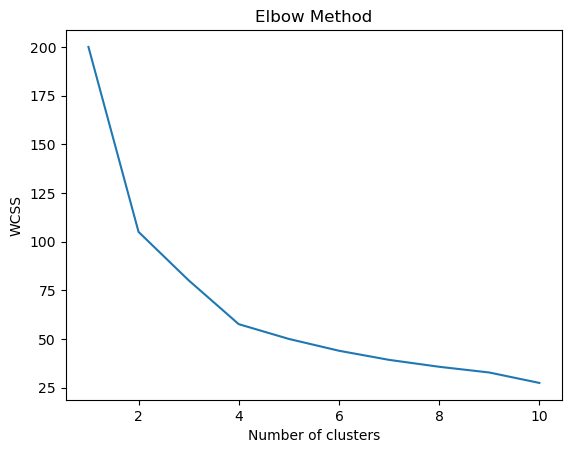

In [39]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(crime_transf)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
# As per above graph 4is the Optimal value for K
km = KMeans(n_clusters=4,random_state=42)
y_pred = km.fit_predict(crime_transf)

In [41]:
y_pred

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [42]:
crime['cluster_kmeans'] = y_pred

In [43]:
crime

,Murder,Assault,UrbanPop,Rape,cluster_kmeans
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [44]:
# Using hierarchical clustering

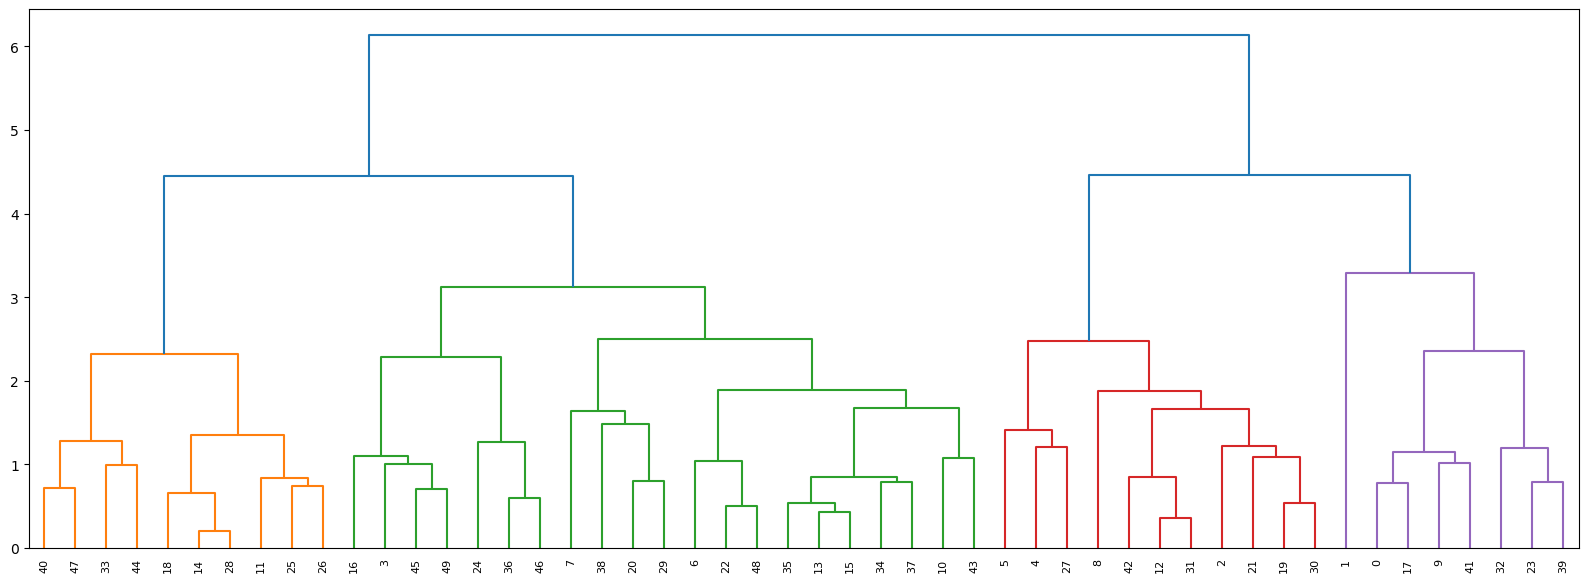

In [45]:
# create dendrogram
plt.figure(figsize=(20, 7))
dendrogram = sch.dendrogram(sch.linkage(crime_transf, method='complete'))

In [46]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [47]:
y_pred1=hc.fit_predict(crime_transf)

In [48]:
y_pred1

array([1, 4, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2,
       0, 1, 0, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 0, 0], dtype=int64)

In [49]:
crime['cluster_hc'] = y_pred1

In [50]:
crime

,Murder,Assault,UrbanPop,Rape,cluster_kmeans,cluster_hc
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,2,4
2,8.1,294,80,31.0,2,2
3,8.8,190,50,19.5,1,0
4,9.0,276,91,40.6,2,2
5,7.9,204,78,38.7,2,2
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,2,2
9,17.4,211,60,25.8,1,1


# Using DBSCAN clustering

In [52]:
from sklearn.cluster import DBSCAN

In [64]:
dbscan = DBSCAN(eps=10, min_samples=20) # Tried with diffrent values of eps and min_samples ..Result is same 
dbscan.fit_predict(crime_transf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [65]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
crime['cluster_DBscan'] = dbscan.labels_

In [67]:
crime

,Murder,Assault,UrbanPop,Rape,cluster_kmeans,cluster_hc,cluster_DBscan
0,13.2,236,58,21.2,1,1,0
1,10.0,263,48,44.5,2,4,0
2,8.1,294,80,31.0,2,2,0
3,8.8,190,50,19.5,1,0,0
4,9.0,276,91,40.6,2,2,0
5,7.9,204,78,38.7,2,2,0
6,3.3,110,77,11.1,0,0,0
7,5.9,238,72,15.8,0,0,0
8,15.4,335,80,31.9,2,2,0
9,17.4,211,60,25.8,1,1,0
